
# Project #2 : Patients Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this data analysis project we will be exploring and analysing a data set of medical appointments and decide which factors make patients miss there scheduled appointment. We asked this question that will be answered at the end of the analysis :  
- Which age group miss more appointments , and does the gender mater ?

(Dataset full discreption found at [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments))

Python with `numpy` , `pandas` ,`seaborn` and `matplotlib` libraries will be used for analysing and drawing conclosions of the dataset.

In [1]:
#Importing the needed loibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

We will be using the patient id as an index column for the data 

In [2]:
# Loading the data
df = pd.read_csv('noshowappointments.csv' , index_col='PatientId')     
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now we will explore the properties of the dataset, and answering the following questions :
- How much data do we have ?
- Do colomns have the right data types for the values ? 
- Do we have any duplicated values ?
- Lastly do we have any empty(null) values ?

In [3]:
df.shape

(110527, 13)

From the above cell output, we can see that we have a 110527 entries.

In [4]:
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Checking the variable type for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Checking the variable type for index column.
df.index

Float64Index([ 29872499824296.0, 558997776694438.0,   4262962299951.0,
                 867951213174.0,   8841186448183.0,  95985133231274.0,
              733688164476661.0,   3449833394123.0,  56394729949972.0,
               78124564369297.0,
              ...
                5574942418928.0,  72633149253362.0,  65423877893936.0,
              996997666245785.0,  36355337746436.0,   2572134369293.0,
                3596266328735.0,  15576631729893.0,  92134931435557.0,
              377511518121127.0],
             dtype='float64', name='PatientId', length=110527)

From the output of the above two cells, we can see the data types for each column , and decide which to be edited .

In [7]:
# check if there are any duplicates.
df.duplicated().sum()

0

In [8]:
# check if there are any null values.
df.isnull().sum()

AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the output of the above two cell, we can see that there are no duplicated rows or null values in the dateset.


### Data Cleaning : refining data type and renameing columns  

At this data cleaning phase we will refine the date so that we can use it easly without any errors. 

from the following cell output we can see that each word start with a Upper case letter, and there are no seperation betwen any two word colomn name. 

In [9]:
df.head(1)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


First, We will change each column name from Upper case to lower case latters.

In [10]:
# Rename columns and make it lower case.
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head(1)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Secondly , We will seperate any two word column names with '_' , and change the '-' to '_' in the `no-show` column.

In [11]:
# rename some columns so that each word is splited with '_'.
df.rename( columns={'appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day', 'no-show' : 'no_show'}, inplace=True)
df.head(1)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The index column data type is `float` , which is not a correct data type for an index , so we will change data type to `int`. Also we will rename the column from `PatientId` to `patient_id`, so that the name is in lower case and each word is seperated woth `_`.

In [12]:
# rename the indesx column , and change its variable type from float to int.
df.index = df.index.astype(int)
df.index.names=['patient_id']
df.head(1)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
patient_id,,,,,,,,,,,,,
29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


By exploring the data types we saw that `scheduled_day` and `appointment_day` columns are storing date and time as `string` , so we need to convert them into `datatime`.

In [13]:
# change the type of date variables from string to datetime.
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 29872499824296 to 377511518121127
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   appointment_id   110527 non-null  int64              
 1   gender           110527 non-null  object             
 2   scheduled_day    110527 non-null  datetime64[ns, UTC]
 3   appointment_day  110527 non-null  datetime64[ns, UTC]
 4   age              110527 non-null  int64              
 5   neighbourhood    110527 non-null  object             
 6   scholarship      110527 non-null  int64              
 7   hipertension     110527 non-null  int64              
 8   diabetes         110527 non-null  int64              
 9   alcoholism       110527 non-null  int64              
 10  handcap          110527 non-null  int64              
 11  sms_received     110527 non-null  int64              
 12  no_show          110527 non-null  ob

In [14]:
#testing a query with the edited date variables
df.query('scheduled_day >= "2015-12-01 00:00:00+00:00" and scheduled_day <= "2016-01-01 00:00:00+00:00" and no_show == "Yes" ').head(5)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
patient_id,,,,,,,,,,,,,
49461353944737,5139826,M,2015-12-08 13:30:21+00:00,2016-05-11 00:00:00+00:00,52,SANTA CECÍLIA,0,1,0,0,0,1,Yes
41734928742669,5140262,F,2015-12-08 14:19:05+00:00,2016-05-25 00:00:00+00:00,56,SANTA CECÍLIA,0,1,0,0,0,1,Yes
7415831328417,5140133,F,2015-12-08 14:05:35+00:00,2016-05-18 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,0,0,0,0,0,Yes
178725979971382,5139864,M,2015-12-08 13:33:50+00:00,2016-05-11 00:00:00+00:00,83,SANTA CECÍLIA,0,1,0,0,1,1,Yes
72796647284433,5140115,M,2015-12-08 14:03:40+00:00,2016-05-18 00:00:00+00:00,68,MARUÍPE,0,1,0,0,0,0,Yes


At this point we finished the data cleaning phase , we changed some data types so that it matches the values stored with it , we changed every column name to lower case and seperated each word with `_` so we can use it easly. 

In the next two cells we will save the edited dataset and take a last check of the data for making sure that every thing is ready to start answering our analysis questions.

In [15]:
#print the data frame to take a look at the edited version.
df.head()

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
patient_id,,,,,,,,,,,,,
29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#Save the edited versoin,the file will be saved with the index column, beacuse the index is the patient id.
df.to_csv('no_show_appointment_ev1.csv' , index=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question : Which age group miss more appointments, and does the gender mater ?

We will now explore the data to see if there any specific age group that miss more appointments, also we will seperate the groups by there gender and see if that will make any differences.

First, we will by get the percentage of the missed appointments in general. 

In [17]:
#Seperate the dataframe into two dataframes.
noshow = df.query('no_show == "Yes"') #Missed appointments
showed = df.query('no_show == "No"')  #Showed at the appointments

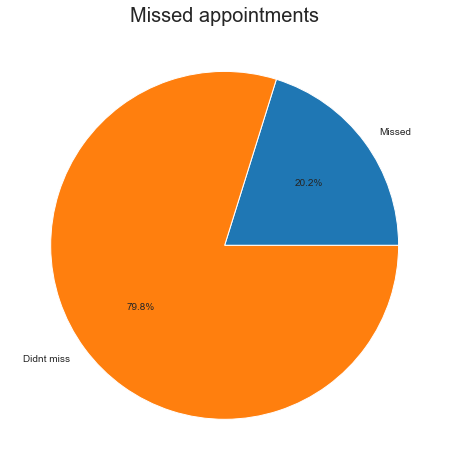

In [18]:
#Plot a piechart of the two dataframes
plt.figure(figsize=(8,8))
plt.pie([noshow.shape[0],showed.shape[0]] , labels=['Missed','Didnt miss'] , autopct='%1.1f%%')
plt.title('Missed appointments' , fontsize=20)
plt.show();

As we can see from the above piechart 20.2% of the appintments are missed, lets explore the missed appointments in more depth to see which gender miss more appointments. 

In [19]:
#Seperate the group into male and female groups.
noshow_m=noshow.query('gender == "M"')
noshow_f=noshow.query('gender == "F"')

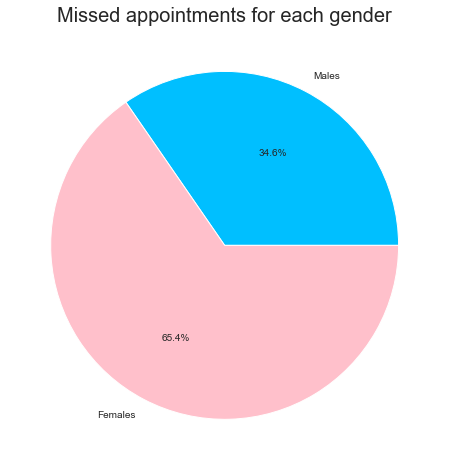

In [20]:
#Plot the piechart for the two genders
plt.figure(figsize=(8,8))
plt.pie([noshow_m.shape[0],noshow_f.shape[0]] , labels=['Males','Females'] , autopct='%1.1f%%' , colors=['deepskyblue','pink'])
plt.title('Missed appointments for each gender' , fontsize=20)
plt.show();

From the above piechart , we can see that that two thirds of the missed appointments are female's , where the last third is for male's.

Now lets seperate the whole data and the missed appointments data into three age groups:
- Elders with ages 65 years old or over 
- Adults with ages from 18 to 64 years old
- Young with ages less that 18 years old.

In [21]:
df_old= df.query('age >= 65')
df_adlt=df.query('age >= 18 and age < 65')
df_yng=df.query('age < 18')

df_old.shape[0] , df_adlt.shape[0] , df_yng.shape[0] #Sizes

(14402, 68745, 27380)

In [22]:
noshow_old= noshow.query('age >= 65')
noshow_adlt= noshow.query('age >= 18 and age < 65')
noshow_yng= noshow.query('age < 18')

noshow_old.shape[0] ,noshow_adlt.shape[0], noshow_yng.shape[0] #Sizes

(2233, 14089, 5997)

Now we will calculate the percentages of the missed appointments of each age group.

In [23]:
perc_yes_old = ( noshow_old.shape[0] / df_old.shape[0] ) * 100
perc_yes_adlt= ( noshow_adlt.shape[0] / df_adlt.shape[0] ) * 100
perc_yes_yng = ( noshow_yng.shape[0] / df_yng.shape[0] ) * 100

perc_yes_old,perc_yes_adlt,perc_yes_yng

(15.504791001249826, 20.494581424103572, 21.902848794740688)

We will draw two charts for the gathered data, first one will be a bar chart representing the percentage of missed appointments of the whole appointments for each age group, and the second one will be piechart representing the percentage of the missed appointments for each age group.

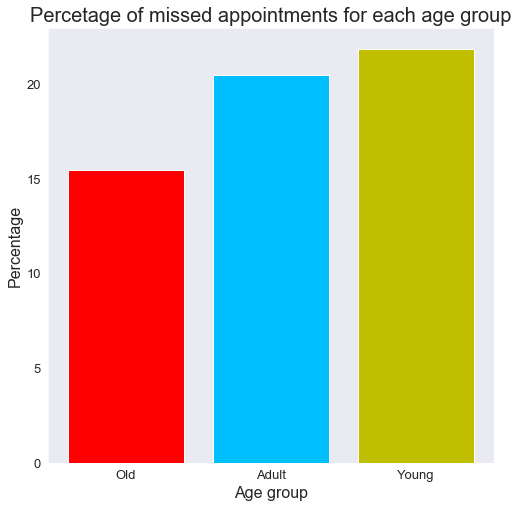

In [24]:
#Bar chart
plt.figure(figsize=(8,8))
plt.bar([1,2,3] , [perc_yes_old,perc_yes_adlt,perc_yes_yng] , tick_label=['Old', 'Adult' , 'Young'] , color=['r','deepskyblue','y'])
plt.title('Percetage of missed appointments for each age group',fontsize=20)
plt.ylabel('Percentage' , fontsize=16)
plt.xlabel('Age group', fontsize=16)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show();

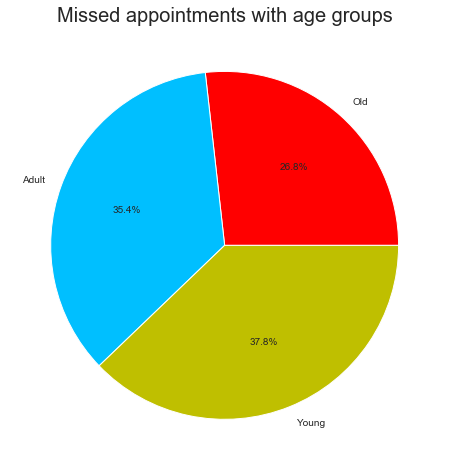

In [25]:
#Piechart
plt.figure(figsize=(8,8))
plt.pie([perc_yes_old,perc_yes_adlt,perc_yes_yng],labels=['Old' , 'Adult' , 'Young'] , autopct='%1.1f%%' , colors=['r','deepskyblue','y'])
plt.title('Missed appointments with age groups' , fontsize=20)
plt.show();

Lastly, we will seperate missed appointments data for males and females ,and will caculate the percentage of the missed appointments for each gender age groups.  

In [26]:
#Seperate noshow_age into seperate dataframes for males and females.

#Males
noshow_old_m= noshow_old.query('gender == "M"').shape[0]
noshow_adlt_m= noshow_adlt.query('gender == "M"').shape[0]
noshow_yng_m= noshow_yng.query('gender == "M"').shape[0]
#Females
noshow_old_f= noshow_old.query('gender == "F"').shape[0]
noshow_adlt_f= noshow_adlt.query('gender == "F"').shape[0]
noshow_yng_f= noshow_yng.query('gender == "F"').shape[0]

noshow_old_m ,noshow_adlt_m, noshow_yng_m , noshow_old_f , noshow_adlt_f, noshow_yng_f #Sizes

(716, 4074, 2935, 1517, 10015, 3062)

In [27]:
#Calculate the percentage for each dataframe

#Males
perc_yes_old_m = ( noshow_old_m / df_old.shape[0] ) * 100
perc_yes_adlt_m= ( noshow_adlt_m / df_adlt.shape[0] ) * 100
perc_yes_yng_m = ( noshow_yng_m / df_yng.shape[0] ) * 100
#Females
perc_yes_old_f = ( noshow_old_f / df_old.shape[0] ) * 100
perc_yes_adlt_f= ( noshow_adlt_f / df_adlt.shape[0] ) * 100
perc_yes_yng_f = ( noshow_yng_f / df_yng.shape[0] ) * 100

For the gathered data we will draw a barchart combining the data for males and females for each age group.  

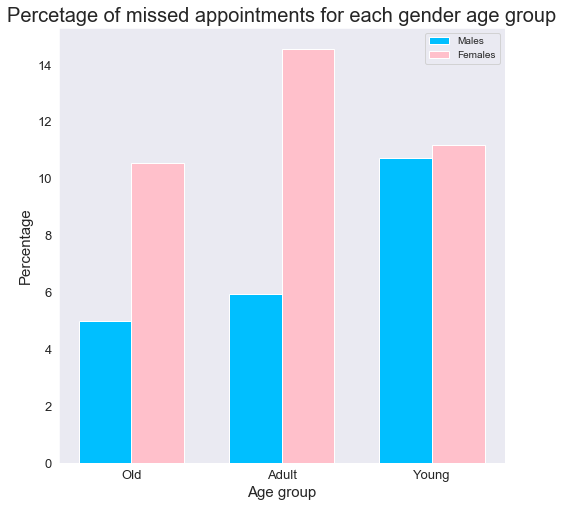

In [28]:
values = [perc_yes_old_m,perc_yes_adlt_m,perc_yes_yng_m,perc_yes_old_f,perc_yes_adlt_f,perc_yes_yng_f]
ind=np.arange(3)
plt.figure(figsize=(8,8))
male_bars = plt.bar(ind , values[:3] , 0.35 , color='deepskyblue' , label='Males')
female_bars = plt.bar(ind + 0.35 , values[3:] , 0.35 , color='pink' , label='Females')
plt.title('Percetage of missed appointments for each gender age group' , fontsize=20)
plt.ylabel('Percentage' , fontsize=15)
plt.xlabel('Age group' , fontsize=15)
plt.xticks( ind + 0.35 /2 , ['Old' , 'Adult' , 'Young'] , fontsize= 13)
plt.yticks(fontsize=13)

plt.legend();

<a id='conclusions'></a>
## Conclusions


In this project we have explored and analysed data for medical appointments ,and we were focused on answering the following questoin "__Which age group miss more appointments , and does the gender mater ?__", we concluded that 20% of the whole appointments are being missed ,with 65% of the missed appointments were female's and 35% were male's appointments. We also seperated the data into three age groups Elders , Adults and Youngs , and concluded that the most appointments are missed by youngs followed by adults then elders , we explored the age groups in more depth and seperated them with genders, we concluded that the most missed appointments percentage were adult females' percentage and the least were old males' percentage.